# .........................................Melbourne Housing Market...............................



In [118]:
#Import essential liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
#read dataset
df = pd.read_csv('Melbourne_housing_FULL.csv')

#### DATA ANALYSIS

In [120]:
#print top 5 rows of dataset
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [121]:
#Lest's get an overview of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

from this information, we can conclude that there are total 20 columns with 12 numerical features and 8 categorical features. Later we need to convert categorical feature into numerical.

In [122]:
#Lets explore our numerical features
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


from this data we can find the deatils of each numeric columns.

In [123]:
#find all the unique values in Suburb
df['Suburb'].nunique()

351

In [124]:
df['Suburb'].value_counts().head(5)

Reservoir         844
Bentleigh East    583
Richmond          552
Glen Iris         491
Preston           485
Name: Suburb, dtype: int64

In [125]:
df['CouncilArea'].nunique()

33

In [126]:
df['CouncilArea'].value_counts().head(5)

Boroondara City Council    3675
Darebin City Council       2851
Moreland City Council      2122
Glen Eira City Council     2006
Melbourne City Council     1952
Name: CouncilArea, dtype: int64

In [127]:
df['SellerG'].nunique()

388

In [128]:
df['SellerG'].value_counts().head(5)

Jellis           3359
Nelson           3236
Barry            3235
hockingstuart    2623
Marshall         2027
Name: SellerG, dtype: int64

In [129]:
df['Price'].groupby(df['Suburb']).agg(['mean', 'count']).sort_values(by='mean', ascending=False).apply(formatting_columns, axis=1).head(15)

,mean,count
Suburb,,
Canterbury,2386270.59,85.0
Middle Park,2232148.15,54.0
Malvern,2087618.64,118.0
Deepdene,2001785.71,7.0
Brighton,1984226.93,317.0
Albert Park,1927650.54,93.0
Balwyn,1893712.05,224.0
Camberwell,1861132.86,280.0
Kew,1796676.04,313.0


(array([1.800e+02, 1.320e+02, 4.560e+02, 9.890e+02, 1.410e+03, 2.075e+03,
        1.930e+03, 1.525e+03, 1.161e+03, 9.160e+02, 7.100e+02, 5.090e+02,
        3.940e+02, 3.120e+02, 2.260e+02, 2.020e+02, 1.420e+02, 8.600e+01,
        7.700e+01, 5.100e+01, 4.900e+01, 3.400e+01, 2.100e+01, 2.200e+01,
        8.000e+00, 2.000e+01, 1.600e+01, 1.000e+01, 4.000e+00, 5.000e+00,
        6.000e+00, 6.000e+00, 6.000e+00, 7.000e+00, 4.000e+00, 6.000e+00,
        7.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  0.  ,  19.98,  39.96,  59.94,  79.92,  99.9 , 119.88, 139.86,
        159.84, 179.82, 199.8 , 219.78, 239.76, 259.74, 279.72, 299.7 ,
        319.68, 339.66, 359.64, 379.62, 399.6 , 419.58, 439.56, 459.54,
        479.52, 499.5 , 519.48, 539.46, 559.44, 579.42, 599.4 , 619.38,
        639.36, 659.34, 679.32, 699.3 , 719.28, 739.26, 759.24, 779.22,
        799.2 , 

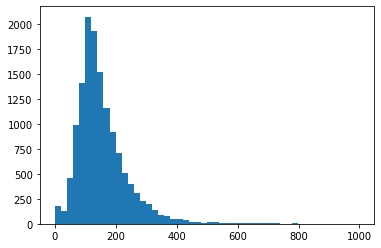

In [130]:
plt.hist(df['BuildingArea'][np.logical_and(df['BuildingArea'].apply(lambda x: not pd.isnull(x)),df['BuildingArea']<1000)],50)

In [131]:
def price_mq(df_col):
    price = df_col[0]
    area = df_col[1]
    if area > 0 and not pd.isnull(area):
        return round(price/area,2)
    else:
        return None

In [132]:
df['Price_EUR'] = df['Price'].apply(lambda x: round(x*0.651199,2))
df['Price_mq'] = df[['Price_EUR','BuildingArea']].apply(price_mq, axis=1)

In [133]:
df[['Price_EUR','Price_mq']].describe()

,Price_EUR,Price_mq
count,2.724700e+04,1.059500e+04
mean,6.838718e+05,6.930815e+03
std,4.177228e+05,3.398291e+04
min,5.535192e+04,1.982000e+01
25%,4.135114e+05,3.417150e+03
50%,5.665431e+05,4.642720e+03
75%,8.433027e+05,6.088660e+03
max,7.293429e+06,2.482371e+06


In [134]:
df[['Price_EUR','Price_mq']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price_EUR  27247 non-null  float64
 1   Price_mq   10595 non-null  float64
dtypes: float64(2)
memory usage: 544.8 KB


In [135]:
import seaborn as sns

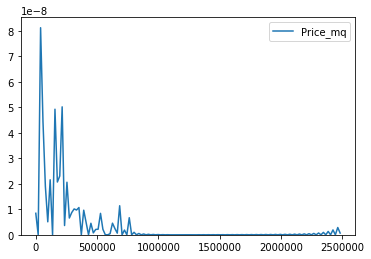

In [136]:
sns.kdeplot(df['Price_mq'][df['Price_mq'].apply(lambda x: not pd.isnull(x))])

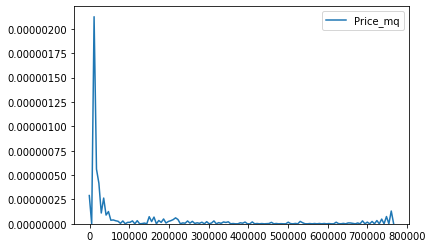

In [137]:
sns.kdeplot(df['Price_mq'][np.logical_and(df['Price_mq'].apply(lambda x: not pd.isnull(x)), df['Price_mq']<1000000)])

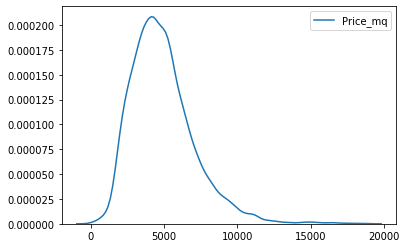

In [138]:
sns.kdeplot(df['Price_mq'][np.logical_and(df['Price_mq'].apply(lambda x: not pd.isnull(x)), df['Price_mq']<20000)])

In [139]:
df['Price_mq'][df['Price_mq']<20000].describe()

count    10459.000000
mean      4919.551592
std       2184.509614
min         19.820000
25%       3402.585000
50%       4608.490000
75%       6022.295000
max      18844.070000
Name: Price_mq, dtype: float64

In [140]:
df[df['Price_mq']>1000000].head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price_EUR,Price_mq
19274,Balwyn,27 Burroughs Rd,5,h,3812000.0,S,VICProp,29/07/2017,7.9,3103.0,...,729.0,1.0,2012.0,Boroondara City Council,-37.806,145.09511,Southern Metropolitan,5682.0,2482370.59,2482370.59


In [141]:
df[df['BuildingArea']<10].count()

Suburb           149
Address          149
Rooms            149
Type             149
Price            125
Method           149
SellerG          149
Date             149
Distance         149
Postcode         149
Bedroom2         149
Bathroom         149
Car              147
Landsize         125
BuildingArea     149
YearBuilt        116
CouncilArea      149
Lattitude        149
Longtitude       149
Regionname       149
Propertycount    149
Price_EUR        125
Price_mq          64
dtype: int64

In [142]:
df['BuildingArea'][df['BuildingArea']<10].describe()

count    149.000000
mean       1.275235
std        1.651561
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        9.000000
Name: BuildingArea, dtype: float64

In [143]:
df_to_plot = df[['Rooms','Price_EUR','Price_mq','Distance','Bedroom2','Bathroom','Car','YearBuilt']].dropna(how='any')

In [144]:
df_to_plot.describe()

,Rooms,Price_EUR,Price_mq,Distance,Bedroom2,Bathroom,Car,YearBuilt
count,10021.000000,1.002100e+04,1.002100e+04,10021.000000,10021.000000,10021.000000,10021.000000,10021.000000
mean,3.109570,7.065845e+05,6.303589e+03,11.512284,3.090909,1.657819,1.706117,1967.102984
std,0.961831,4.425485e+05,3.163233e+04,7.053890,0.964240,0.718424,0.968955,36.833251
min,1.000000,8.530707e+04,3.091200e+02,0.000000,0.000000,1.000000,0.000000,1196.000000
25%,3.000000,4.141626e+05,3.431720e+03,6.500000,2.000000,1.000000,1.000000,1950.000000
50%,3.000000,5.795671e+05,4.633530e+03,10.500000,3.000000,2.000000,2.000000,1970.000000
75%,4.000000,8.660947e+05,6.036400e+03,14.300000,4.000000,2.000000,2.000000,2000.000000
max,12.000000,5.860791e+06,2.482371e+06,48.100000,12.000000,9.000000,10.000000,2019.000000


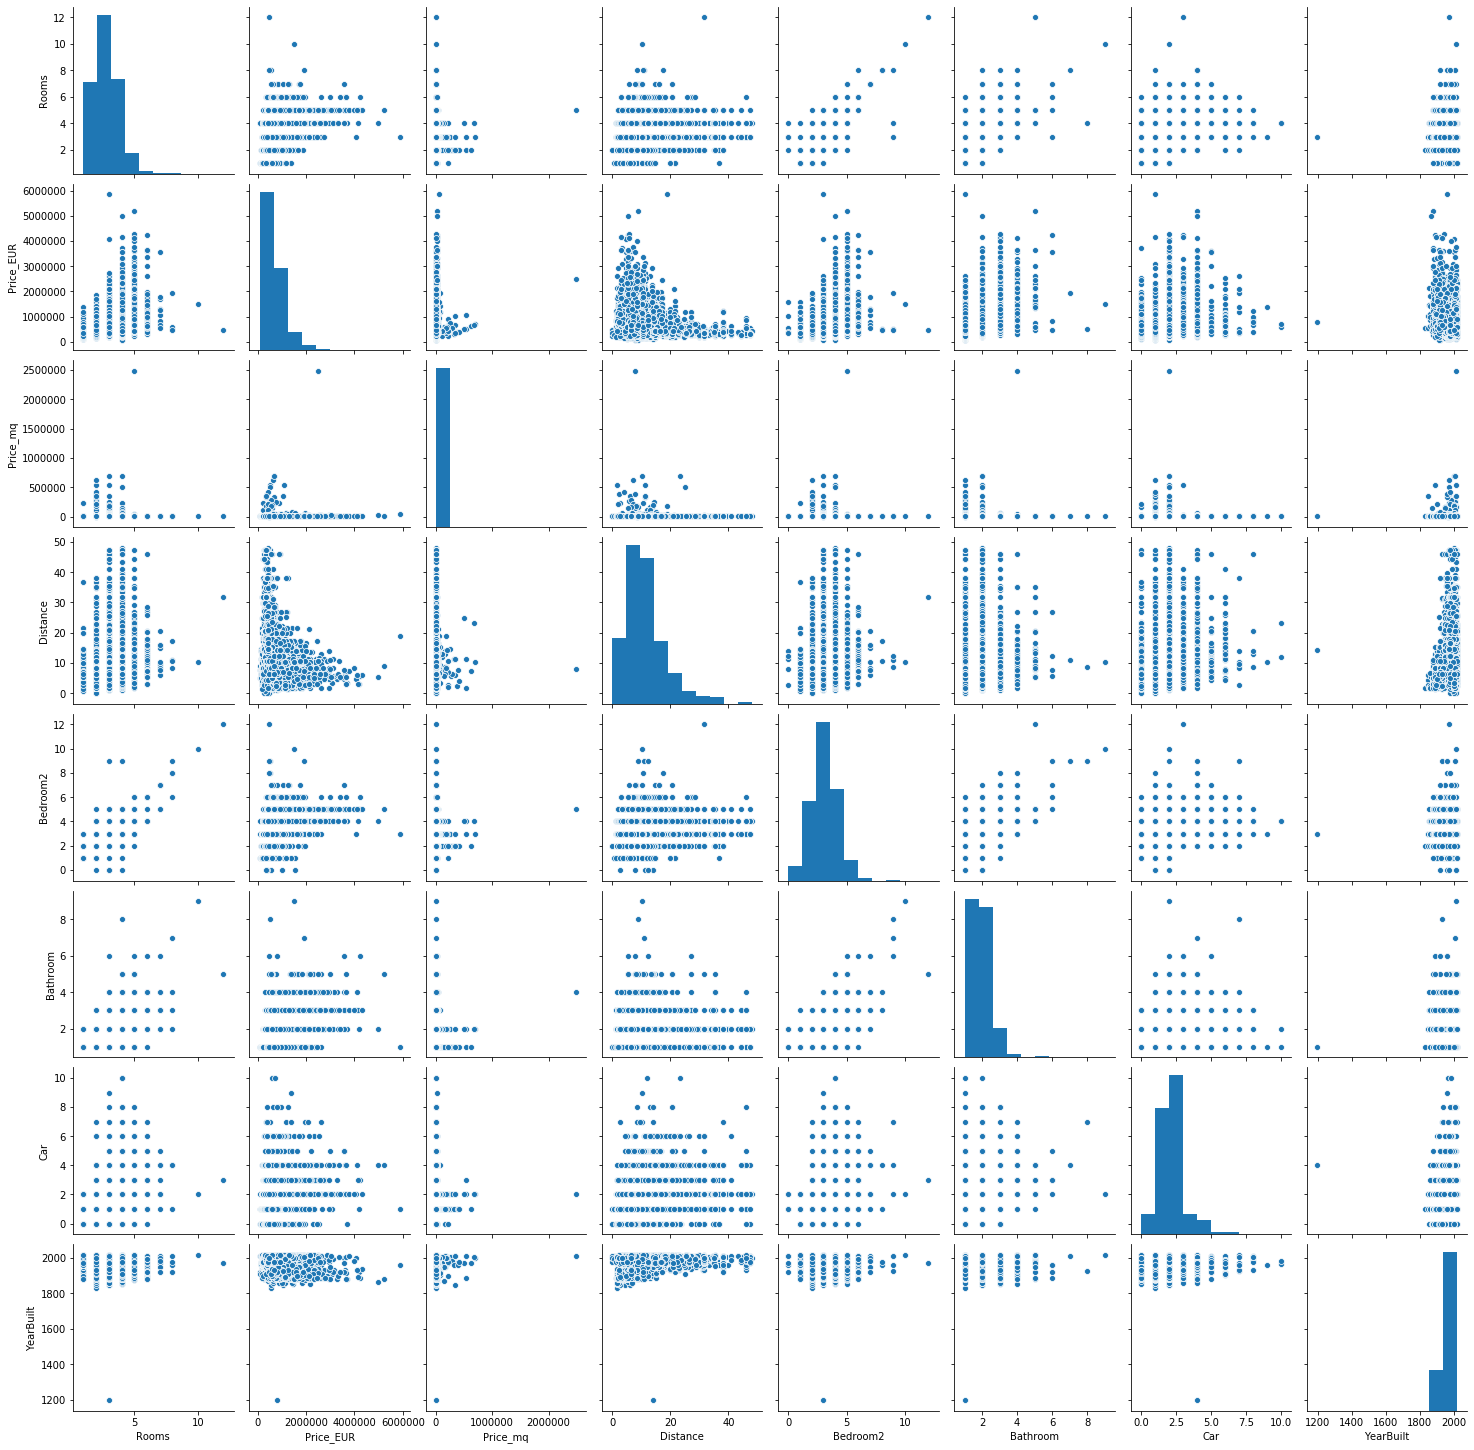

In [145]:
sns.pairplot(df_to_plot)

In [146]:
df[df['Rooms']>11]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price_EUR,Price_mq
8309,Preston,12 Lyonsville Av,12,h,NaN,SN,Barry,28/08/2016,8.8,3072.0,...,NaN,NaN,NaN,Darebin City Council,NaN,NaN,Northern Metropolitan,14577.0,NaN,NaN
12959,Hawthorn,10 Berkeley St,12,h,4700000.0,PI,Property,20/05/2017,4.6,3122.0,...,NaN,NaN,NaN,Boroondara City Council,-37.83030,145.03670,Southern Metropolitan,11308.0,3060635.30,NaN
26210,Mitcham,20 Harrison St,16,h,5000000.0,S,Buxton,28/10/2017,17.2,3132.0,...,NaN,NaN,NaN,Whitehorse City Council,-37.81405,145.19891,Eastern Metropolitan,6871.0,3255995.00,NaN
27150,Melton,213 Station Rd,12,h,710000.0,S,PRDNationwide,11/11/2017,31.7,3337.0,...,960.0,223.0,1970.0,Melton City Council,-37.68830,144.57760,Western Victoria,3600.0,462351.29,2073.32


Before I deal with outliers and Nan I will drop the Landsize, BuildingArea and YearBuilt variables because they have too many missing values. Consequently I have to drop the price_mq variable that I built from the Price and BuildingArea variables.

In [147]:
df.drop(['Landsize','BuildingArea','YearBuilt','Price_mq'], axis=1, inplace=True)
df.dropna(how='any',inplace=True)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20401 entries, 1 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         20401 non-null  object 
 1   Address        20401 non-null  object 
 2   Rooms          20401 non-null  int64  
 3   Type           20401 non-null  object 
 4   Price          20401 non-null  float64
 5   Method         20401 non-null  object 
 6   SellerG        20401 non-null  object 
 7   Date           20401 non-null  object 
 8   Distance       20401 non-null  float64
 9   Postcode       20401 non-null  float64
 10  Bedroom2       20401 non-null  float64
 11  Bathroom       20401 non-null  float64
 12  Car            20401 non-null  float64
 13  CouncilArea    20401 non-null  object 
 14  Lattitude      20401 non-null  float64
 15  Longtitude     20401 non-null  float64
 16  Regionname     20401 non-null  object 
 17  Propertycount  20401 non-null  float64
 18  Price_

In [149]:
def check_outliers(dfx):
    dfx['_tmp_'] = ''
    for i in df.columns:
        if(i not in ['Lattitude', 'Longtitude', 'Postcode'] and (dfx[i].dtype == np.float64 or dfx[i].dtype == np.int64)):
            x = dfx[i]
            idx = np.abs(x - x.mean()) / x.std() > 4.0
            dfx.loc[idx,'_tmp_'] = i

In [150]:
check_outliers(df)
df[df['_tmp_']!='']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price_EUR,_tmp_
86,Airport West,3 Deidre Ct,3,h,895000.0,PI,Rendina,10/09/2016,13.5,3042.0,3.0,1.0,6.0,Moonee Valley City Council,-37.72490,144.87280,Western Metropolitan,3464.0,582823.10,Car
178,Albert Park,115 Page St,4,h,4735000.0,S,Marshall,25/02/2017,3.3,3206.0,4.0,2.0,1.0,Port Phillip City Council,-37.84770,144.95580,Southern Metropolitan,3280.0,3083427.26,Price_EUR
182,Albert Park,22 Greig St,3,h,3755000.0,S,Greg,26/07/2016,3.3,3206.0,3.0,2.0,2.0,Port Phillip City Council,-37.84130,144.95000,Southern Metropolitan,3280.0,2445252.25,Price_EUR
235,Altona,29 Rose St,4,h,1780000.0,SP,Greg,4/06/2016,13.8,3018.0,4.0,3.0,6.0,Hobsons Bay City Council,-37.86810,144.81900,Western Metropolitan,5301.0,1159134.22,Car
284,Altona North,45 Hearn St,5,h,1085000.0,S,FN,3/09/2016,11.1,3025.0,5.0,3.0,6.0,Hobsons Bay City Council,-37.83880,144.85670,Western Metropolitan,5132.0,706550.91,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34494,Middle Park,33 Canterbury Rd,6,h,5575000.0,S,Marshall,24/02/2018,3.0,3206.0,6.0,4.0,4.0,Port Phillip City Council,-37.84535,144.96044,Southern Metropolitan,2019.0,3630434.42,Price_EUR
34496,Middle Park,108 Hambleton St,3,h,3750000.0,SA,Greg,24/02/2018,3.0,3206.0,3.0,1.0,0.0,Port Phillip City Council,-37.84794,144.96117,Southern Metropolitan,2019.0,2441996.25,Price_EUR
34755,Sunshine,14 Alfred St,4,h,1237500.0,S,Jas,24/02/2018,10.5,3020.0,4.0,2.0,7.0,Brimbank City Council,-37.79227,144.84269,Western Metropolitan,3755.0,805858.76,Car
34784,Thomastown,6 Glebe Pl,3,h,625000.0,S,Love,24/02/2018,15.3,3074.0,3.0,1.0,6.0,Whittlesea City Council,-37.67382,145.00454,Northern Metropolitan,7955.0,406999.38,Car


In [151]:
df = df[df['_tmp_']=='']
df.drop(['_tmp_'], axis=1, inplace=True)

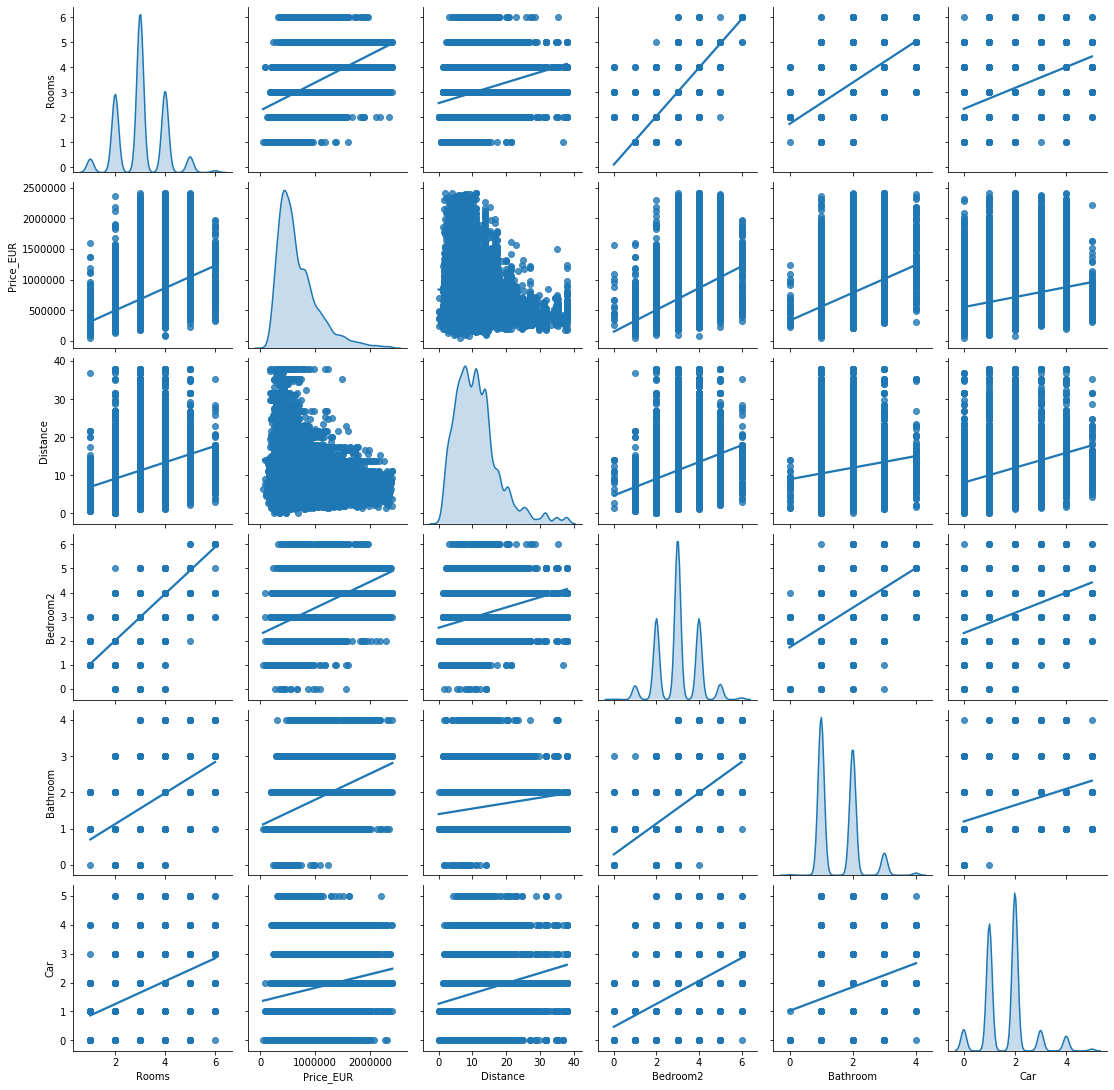

In [152]:
sns.pairplot(df[['Rooms','Price_EUR','Distance','Bedroom2','Bathroom','Car']], kind='reg', diag_kind='kde')

In [153]:
df['last_addr'] = df['Address'].apply(lambda x: x.split()[-1].lower())

In [154]:
df.last_addr.nunique()

76

In [155]:
df.last_addr.value_counts().head(15)

st     10594
rd      3771
ct      1162
av      1043
dr       867
cr       456
gr       455
pl       310
pde      300
cl       208
wy       155
bvd      108
la       100
tce       77
cct       61
Name: last_addr, dtype: int64

In [156]:
final_df = pd.get_dummies(data=df , columns=['last_addr','Suburb','Regionname'],drop_first=True)

In [157]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19955 entries, 1 to 34856
Columns: 422 entries, Address to Regionname_Western Victoria
dtypes: float64(10), int64(1), object(6), uint8(405)
memory usage: 11.1+ MB


In [158]:
final_df.columns

Index(['Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2',
       ...
       'Suburb_Yallambie', 'Suburb_Yarra Glen', 'Suburb_Yarraville',
       'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan',
       'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria'],
      dtype='object', length=422)

In [159]:
y = final_df['Price_EUR']
X = final_df.drop(['Price','Price_EUR', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'Postcode', 'CouncilArea', 'Lattitude', 'Longtitude'], axis=1)

In [160]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [161]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)
lm = LinearRegression()

In [162]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 1.46797164e+05 -3.35630354e+04  4.36749211e+04  4.89854594e+04
  3.76366803e+04 -6.21908386e+08 -3.17109234e+05 -6.32462684e+03
 -1.43072053e+05 -3.80289917e+04  1.69727407e+04  5.86695158e+11
 -6.13190815e+04 -7.03109114e+04 -9.87792060e+04 -8.73481620e+04
  4.31306340e+03 -5.15982095e+04  5.80965111e+05  7.32396445e+04
 -2.09928194e+04 -1.49749120e+04 -1.79073415e+05  7.64077350e+04
 -6.19055739e+03 -4.93316705e+04 -2.06256108e+05 -6.16611219e+04
  1.62957914e+10 -4.88129424e+04 -7.73962964e+04 -8.98911740e+04
  6.52479248e+04 -2.15643033e+05 -1.75170971e+05 -1.38679460e+05
  7.53200227e+04 -2.09865079e+05 -1.64561999e+04 -1.77744903e+04
  3.82473615e+10  1.50673027e+05 -1.15953791e+05  1.48606486e+05
  4.75205954e+05 -3.02864096e+05 -1.61180869e+05 -3.83760621e+04
 -9.65012159e+04 -1.59783254e+05  5.57614266e+10  5.45614599e+04
 -5.86953113e+04 -4.22467950e+04 -3.99575637e+05 -1.28692059e+04
 -4.77048325e+04  5.29188418e+04 -4.22898605e+04 -2.71195709e+05
 -3.41281

In [164]:
y_pred = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

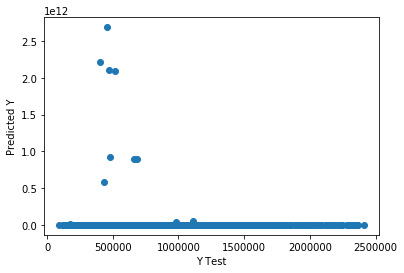

In [165]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [166]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2505455585.8740916
MSE: 4.750591517626613e+21
RMSE: 68924534946.75618


In [167]:
coefficient = pd.DataFrame(lm.coef_,X.columns)
coefficient.columns = ['Coefficient']
coefficient

,Coefficient
Rooms,1.467972e+05
Distance,-3.356304e+04
Bedroom2,4.367492e+04
Bathroom,4.898546e+04
Car,3.763668e+04
...,...
Regionname_Northern Victoria,1.048493e+12
Regionname_South-Eastern Metropolitan,3.583810e+11
Regionname_Southern Metropolitan,4.745093e+12
Regionname_Western Metropolitan,6.486133e+11
